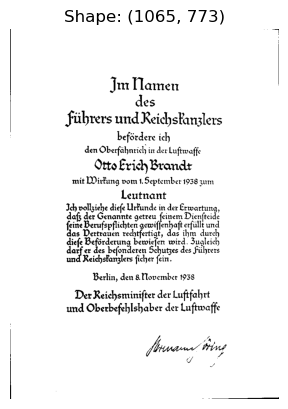

In [14]:
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage import measure, morphology
from skimage.color import label2rgb
from skimage.measure import regionprops
import numpy as np
import os

# the parameters are used to remove small size connected pixels outliar 
constant_parameter_1 = 84
constant_parameter_2 = 250
constant_parameter_3 = 100

# the parameter is used to remove big size connected pixels outliar
constant_parameter_4 = 18

data_path = "C:/Users/Sadek/Documents/GitHub/Project/offline-signature/data"

def display_image(image, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.title("Shape: {}".format(image.shape))
    plt.show()

# read the input image
image_path = os.path.join(data_path + "/input/doc1.jpg")
# read the input image
img = cv2.imread(image_path, 0)

img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary

display_image(img)

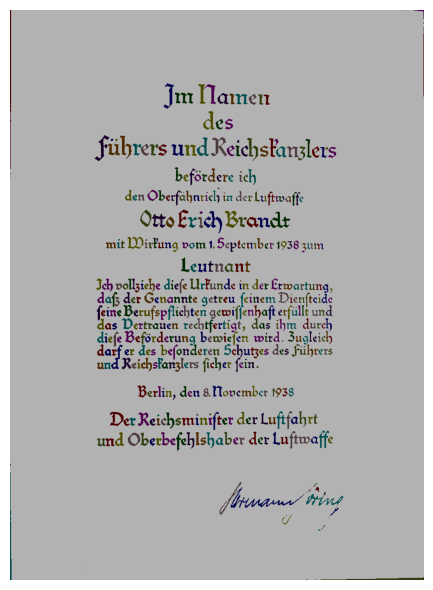

In [15]:
# connected component analysis by scikit-learn framework
blobs = img > img.mean()
blobs_labels = measure.label(blobs, background=1)
image_label_overlay = label2rgb(blobs_labels, image=img)

fig, ax = plt.subplots(figsize=(10, 6))


# plot the connected components (for debugging)
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()

the_biggest_component: 747
average: 94.79089026915113
a4_small_size_outliar_constant: 382.11574484866406
a4_big_size_outliar_constant: 6878.0834072759535


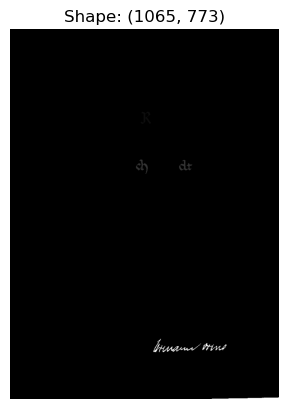

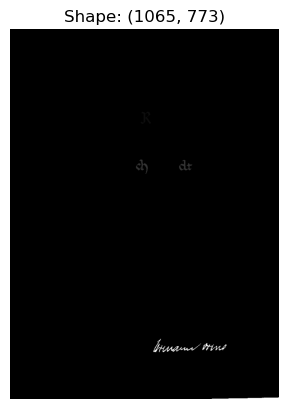

In [16]:
the_biggest_component = 0
total_area = 0
counter = 0
average = 0.0
for region in regionprops(blobs_labels):
    if (region.area > 10):
        total_area = total_area + region.area
        counter = counter + 1
    # print region.area # (for debugging)
    # take regions with large enough areas
    if (region.area >= 250):
        if (region.area > the_biggest_component):
            the_biggest_component = region.area

average = (total_area/counter)
print("the_biggest_component: " + str(the_biggest_component))
print("average: " + str(average))

# experimental-based ratio calculation, modify it for your cases
# a4_small_size_outliar_constant is used as a threshold value to remove connected outliar connected pixels
# are smaller than a4_small_size_outliar_constant for A4 size scanned documents
a4_small_size_outliar_constant = ((average/constant_parameter_1)*constant_parameter_2)+constant_parameter_3
print("a4_small_size_outliar_constant: " + str(a4_small_size_outliar_constant))

# experimental-based ratio calculation, modify it for your cases
# a4_big_size_outliar_constant is used as a threshold value to remove outliar connected pixels
# are bigger than a4_big_size_outliar_constant for A4 size scanned documents
a4_big_size_outliar_constant = a4_small_size_outliar_constant*constant_parameter_4
print("a4_big_size_outliar_constant: " + str(a4_big_size_outliar_constant))

# remove the connected pixels are smaller than a4_small_size_outliar_constant
pre_version = morphology.remove_small_objects(blobs_labels, a4_small_size_outliar_constant)
display_image(pre_version)
# remove the connected pixels are bigger than threshold a4_big_size_outliar_constant 
# to get rid of undesired connected pixels such as table headers and etc.
component_sizes = np.bincount(pre_version.ravel())
too_small = component_sizes > (a4_big_size_outliar_constant)
too_small_mask = too_small[pre_version]
pre_version[too_small_mask] = 0
display_image(pre_version)
# save the the pre-version which is the image is labelled with colors
# as considering connected components
# plt.imsave('pre_version.png', pre_version)

# # read the pre-version
# img = cv2.imread('pre_version.png', 0)
# # ensure binary
# img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# # save the the result
# cv2.imwrite("./outputs/output.png", img)